**Importing Libraries**

In [1]:
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Load the Dataset**

In [2]:
df = pd.read_csv('dataset/sign_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


**Data Preprocessing**

In [3]:
def load_data(path):
    df = pd.read_csv('dataset/sign_train.csv')
    y = np.array([label if label < 9
                  else label-1 for label in df['label']])
    df = df.drop('label', axis=1)
    x = np.array([df.iloc[i].to_numpy().reshape((28, 28))
                  for i in range(len(df))]).astype(float)
    x = np.expand_dims(x, axis=3)
    y = pd.get_dummies(y).values

    return x, y

X_train, Y_train = load_data('dataset/sign_train.csv')
X_test, Y_test = load_data('dataset/sign_test.csv')
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [4]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(21964, 28, 28, 1) (21964, 24)
(27455, 28, 28, 1) (27455, 24)


**Data Visualization**

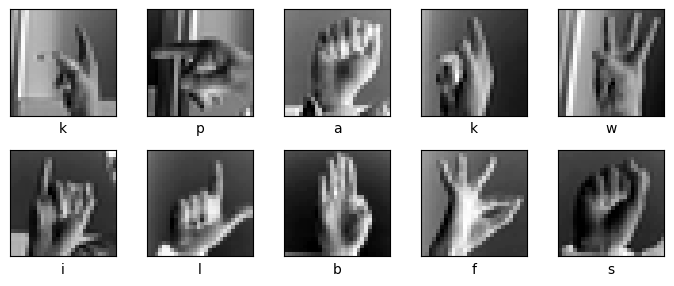

In [5]:
class_names = list(string.ascii_lowercase[:26].replace(
    'j', '').replace('z', ''))

plt.figure(figsize=(7, 7))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(Y_train, axis=1)[i]])
plt.tight_layout()
plt.show()

**Model Development**

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3, 3),
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='softmax')
])
model.summary()

c:\Users\Laptop Lab\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1600)           │         6,400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         6,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 442,264 (1.69 MB)

 Trainable params: 438,552 (1.67 MB)

 Non-trainable params: 3,712 (14.50 KB)

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Training the Model**

In [8]:
history = model.fit(
    X_train, Y_train, 
    validation_data=(X_val, Y_val), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.9051 - loss: 0.3576 - val_accuracy: 0.9754 - val_loss: 0.0962
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9964 - loss: 0.0257 - val_accuracy: 0.9404 - val_loss: 0.1936
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9823 - loss: 0.0616 - val_accuracy: 0.5724 - val_loss: 2.6627
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9943 - loss: 0.0267 - val_accuracy: 0.9856 - val_loss: 0.0484
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9973 - loss: 0.0117 - val_accuracy: 0.9854 - val_loss: 0.0793
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9846 - loss: 0.0508 - val_accuracy: 0.9643 - val_loss: 0.1194
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9977 - loss: 0.0108 - val_accuracy: 0.9991 - val_loss: 0.0053
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9982 - loss: 0.0084 - 

**Model Evaluation**

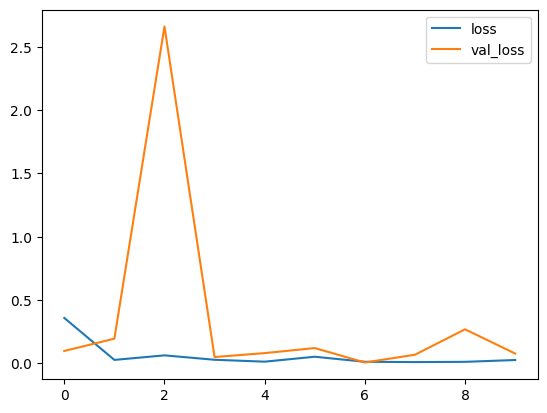

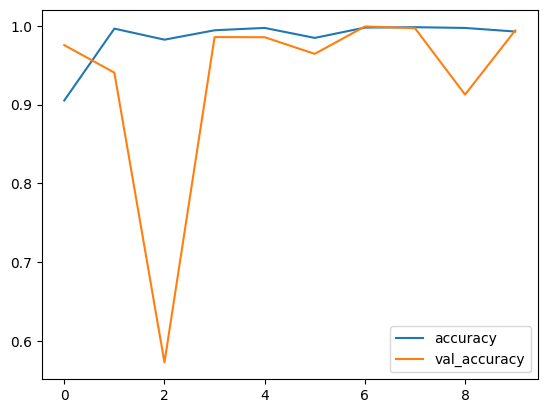

In [9]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

In [10]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9962 - loss: 0.0537
Test Accuracy: 99.62%


Saving the Model

In [11]:
model.save('sign_language_model.h5')